In [1]:
print('Hello world')

Hello world


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.show_id.unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## checking null values 

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(5332, 12)

## Exploratory Data Analysis

In [10]:
import matplotlib.pyplot as plt

In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
labels= df.type.unique()
labels

array(['Movie', 'TV Show'], dtype=object)

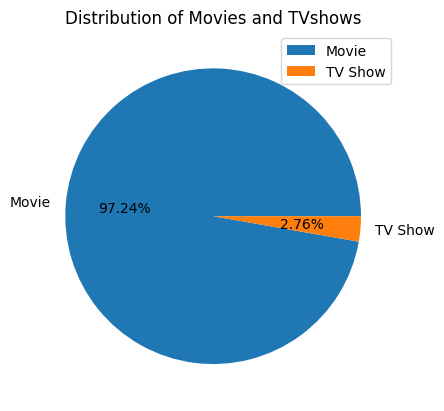

In [13]:
plt.pie(df.type.value_counts(),labels=labels,autopct='%0.2f%%')
plt.legend()
plt.title('Distribution of Movies and TVshows')
plt.show()

## As it is very clear we have more number of movies over here (dataset)

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


## Top 10 countries by Netflix movies

In [15]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
top_10_countries = df['country'].value_counts().nlargest(10)
top_10_countries

country
United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: count, dtype: int64

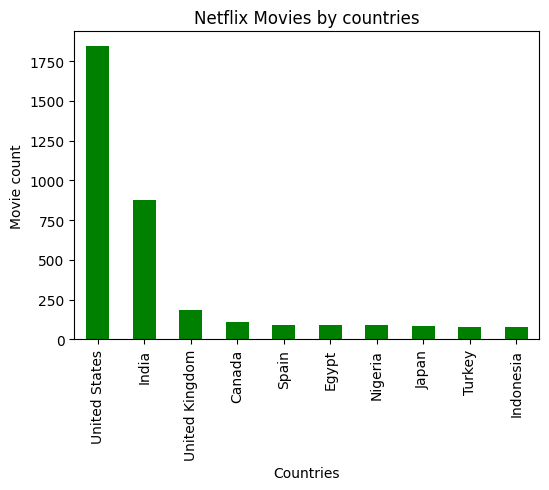

In [17]:
%matplotlib inline
plt.figure(figsize=(6,4))
top_10_countries.plot(kind='bar',color='green')
plt.xlabel('Countries')
plt.ylabel('Movie count')
plt.title('Netflix Movies by countries')
plt.show()

### as you can see the majorly the movies available are made/based in United States 

In [18]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
df.date_added.unique()

array(['September 24, 2021', 'September 23, 2021', 'September 21, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [20]:
df2 = df.copy()
df2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [21]:
int(df2.date_added.unique()[0].split(',')[1])

2021

In [22]:
df2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [23]:
df2['year'] = df2['date_added'].str.split(', ').str[-1]
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021


In [24]:
df2.year.unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2009', '2008', '2010'], dtype=object)

In [25]:
year_count = df2.year.value_counts()
year_count.sort_index(inplace=True)
year_count.head()

year
2008     1
2009     2
2010     1
2011    13
2012     3
Name: count, dtype: int64

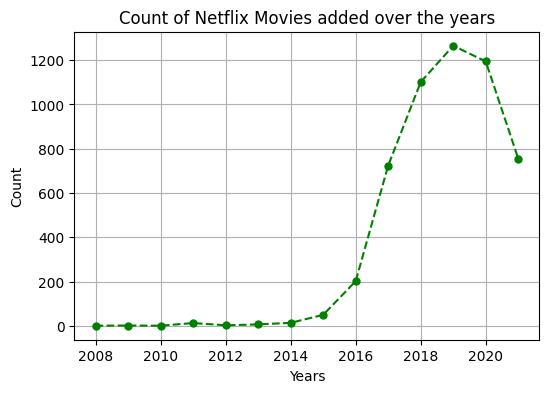

In [49]:
plt.figure(figsize=(6,4))
year_count.plot(kind='line',color='green',marker='o',markersize=5,linestyle='--')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Count of Netflix Movies added over the years')
plt.grid()
plt.show()

## from this graph we can say more movies were added into netflix after 2016 and where highest in 2018 as per the available data.

In [27]:
top_direct = df2.director.value_counts().nlargest(10)
top_10_direct = pd.DataFrame(top_direct)
top_10_direct

,count
director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12
Steven Spielberg,11
Don Michael Paul,10


<Figure size 500x500 with 0 Axes>

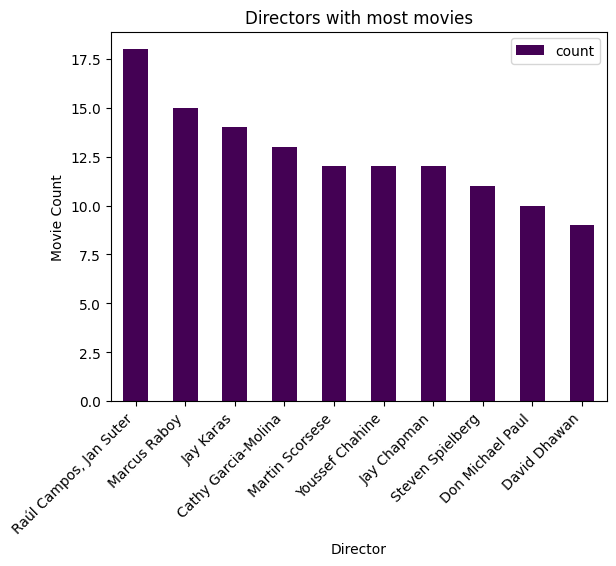

In [28]:
%matplotlib inline
plt.figure(figsize=(5,5))
top_10_direct.plot(kind='bar',stacked=True,colormap='viridis')
plt.xlabel('Director')
plt.ylabel('Movie Count')
plt.title('Directors with most movies')
plt.xticks(rotation=45, ha='right')
plt.show()

## Raul Campos, Jan Suter are the top directors as per the dataset.

## Top rated Cast

In [29]:
df2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year'],
      dtype='object')

In [30]:
top_cast=df2.groupby("cast")["rating"].count().sort_values(ascending=False).head(10)
top_cast

cast
Samuel West           10
Jeff Dunham            7
Kevin Hart             6
Jim Gaffigan           5
Bill Burr              5
Bill Hicks             4
David Attenborough     4
Craig Sechler          4
Jay O. Sanders         4
Jerry Seinfeld         4
Name: rating, dtype: int64

## Distribution of Movie rating

In [31]:
df2.rating.value_counts()

rating
TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64

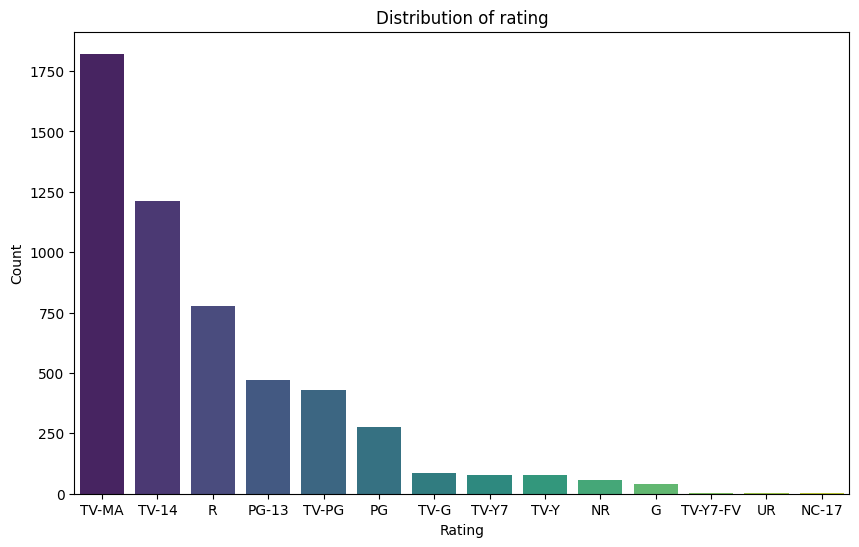

In [32]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df2,x='rating',order=df2.rating.value_counts().index,palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of rating')
plt.show()

## Movie Recommendation System

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
df2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year'],
      dtype='object')

In [35]:
df2['combined_features']=df2['cast']+' '+df2['director']+' '+df2['rating']+' '+df2['description']+' '+df2['listed_in']
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,combined_features
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T..."
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ..."
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi..."


In [46]:
df2.title.unique()[34]

'A Champion Heart'

In [36]:
df2.combined_features[7]

'Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri Haile Gerima TV-MA On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past. Dramas, Independent Movies, International Movies'

## we will use all this features to be used in our model

In [37]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(df2['combined_features'])

In [38]:
similarity_matrix = cosine_similarity(feature_vectors)

In [39]:
similarity_matrix

array([[1.        , 0.01854624, 0.00928094, ..., 0.01481435, 0.00838841,
        0.02318289],
       [0.01854624, 1.        , 0.        , ..., 0.00962194, 0.00740358,
        0.01480718],
       [0.00928094, 0.        , 1.        , ..., 0.04803068, 0.0233326 ,
        0.01668637],
       ...,
       [0.01481435, 0.00962194, 0.04803068, ..., 1.        , 0.05267017,
        0.00492958],
       [0.00838841, 0.00740358, 0.0233326 , ..., 0.05267017, 1.        ,
        0.00914521],
       [0.02318289, 0.01480718, 0.01668637, ..., 0.00492958, 0.00914521,
        1.        ]])

In [40]:
def recommend_movies(movie_title, num_recommendations=5):
    movie_index = df[df['title'] == movie_title].index
    if movie_index.empty:
        return "Movie not found in the dataset."
    else:
        index = movie_index[0]
        similarity_scores = list(enumerate(similarity_matrix[index]))
        sorted_movies = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        recommended_movies = [df['title'].iloc[i[0]] for i in sorted_movies[1:num_recommendations+1]]
        return recommended_movies

In [41]:
recommendations = recommend_movies('Dark Skies')
print(recommendations)

['24 Hours to Live', 'The Edge of Seventeen', 'A Glimpse Inside the Mind of Charles Swan III', 'Life Ki Toh Lag Gayi', 'Dead Man Down']


In [42]:
recommendations = recommend_movies('')
print(recommendations)

Movie not found in the dataset.


In [48]:
recommendations = recommend_movies('A Champion Heart')
print(recommendations)

['Bombairiya', 'One by Two', 'Pad Man', 'Golmaal: Fun Unlimited', 'Next Enti?']


# Conclusion

In conclusion, we successfully built a movie recommendation system using a content-based filtering approach. By leveraging features such as cast, director, genre, and description, we transformed textual information into numerical representations using TF-IDF vectorization. This allowed us to calculate cosine similarity between movies and identify those with similar characteristics.

The resulting recommendation system can provide users with a list of movies similar to a given title, enhancing their movie discovery experience. This approach is particularly useful when dealing with cold-start problems, where user preferences are unknown.

However, content-based filtering has limitations. It relies solely on the available features and may not capture nuanced user preferences. To further improve the recommendation system, exploring collaborative filtering techniques or hybrid approaches could be considered.